# ARI scores for the precomputed datasets and clustering algorithms

In [1]:
%load_ext autoreload
%autoreload 2

import os
os.environ["XLA_PYTHON_CLIENT_ALLOCATOR"] = "platform"
os.environ["XLA_PYTHON_CLIENT_PREALLOCATE"] = "false"

In [2]:
import corc.our_datasets
import corc.our_algorithms
from tqdm import tqdm
import pickle
import sklearn
import numpy as np
import pandas as pd


In [22]:
metrics_path = "../cache/metrics/figure2.pkl"

with open(metrics_path, "rb") as f:
    metrics = pickle.load(f)

In [23]:
metrics.keys()

dict_keys(['densired8', 'densired16', 'densired32', 'densired64', 'densired_soft_8', 'densired_soft_16', 'densired_soft_32', 'densired_soft_64', 'mnist8', 'mnist16', 'mnist32', 'mnist64'])

In [25]:
dataset = "densired_soft_16"

In [26]:
df = pd.DataFrame(metrics[dataset])
df = df.T
df.columns = ['ARI (↑)', 'NMI (↑)', 'FM (↑)', 'VI (↓)']
df

,ARI (↑),NMI (↑),FM (↑),VI (↓)
MiniBatch\nKMeans,0.840567,0.815357,0.885663,0.554340
Agglomerative\nClustering,0.868876,0.811145,0.909662,0.498384
HDBSCAN,0.003837,0.004492,0.426383,1.968905
Gaussian\nMixture,0.678238,0.659114,0.768717,0.941258
t-Student\nMixture,0.897433,0.823379,0.927701,0.478697
Spectral\nClustering,0.730798,0.804895,0.806364,0.599138
Affinity\nPropagation,0.537887,0.564567,0.735970,0.913989
MeanShift,0.786306,0.682507,0.846020,1.053425
Leiden,0.934459,0.876579,0.953593,0.344912
PAGA,0.826939,0.781451,0.884944,0.544889


In [27]:
algorithms = ["Agglomerative\nClustering", "HDBSCAN", "t-Student\nMixture", "Gaussian\nMixture", "Leiden", "TMM-NEB"]
datasets = metrics.keys()
# datasets = ["densired8", "densired16", "densired32", "densired64", "densired_soft_8", "densired_soft_16", "densired_soft_32", "densired_soft_64", "mnist8", "mnist16", "mnist32", "mnist64"]


In [28]:
def create_dataframe(metrics, index, algorithms, datasets):
    df = pd.DataFrame({dataset: {algorithm: np.round(metrics[dataset][algorithm][index], decimals=2) for algorithm in metrics[dataset] if algorithm in algorithms} for dataset in datasets})
    alg_names = df.index.tolist()
    
    # rename algorithms
    for i in range(len(alg_names)):
        if alg_names[i] in corc.our_algorithms.ALG_DISPLAYNAMES.keys():
            alg_names[i] = corc.our_algorithms.ALG_DISPLAYNAMES[alg_names[i]]
    df.index = alg_names

    # rename datasets
    dataset_names = df.columns.tolist()
    for i in range(len(dataset_names)):
        if dataset_names[i] in corc.our_datasets.dataset_displaynames.keys():
            dataset_names[i] = corc.our_datasets.dataset_displaynames[dataset_names[i]]
    df.columns = dataset_names

    return df
    

In [29]:
ari_table = create_dataframe(metrics, 0, algorithms, datasets)
nmi_table = create_dataframe(metrics, 1, algorithms, datasets)
fm_table = create_dataframe(metrics, 2, algorithms, datasets)
vi_table = create_dataframe(metrics, 3, algorithms, datasets)

In [30]:
ari_table

,Densired\n'circles' 8D,Densired\n'circles' 16D,Densired\n'circles' 32D,Densired\n'circles' 64D,Densired\n'Stud-t' 8D,Densired\n'Stud-t' 16D,Densired\n'Stud-t' 32D,Densired\n'Stud-t' 64D,MNIST-Nd\n8D,MNIST-Nd\n16D,MNIST-Nd\n32D,MNIST-Nd\n64D
Agglomerative\nClustering,0.68,0.66,0.59,0.75,0.56,0.87,0.90,0.64,0.80,0.68,0.62,0.49
HDBSCAN,0.00,0.00,0.44,0.00,0.01,0.00,0.00,0.00,0.03,0.06,0.07,0.07
Gaussian\nMixture,0.79,0.77,0.69,0.91,0.74,0.68,0.49,0.42,0.89,0.74,0.73,0.62
Student-t\nMixture,0.81,0.69,0.58,0.61,0.74,0.90,0.90,0.75,0.85,0.86,0.90,0.77
Leiden,0.83,0.77,0.76,0.89,0.89,0.93,0.91,0.80,0.89,0.92,0.93,0.71
t-NEB (ours),0.92,1.00,0.94,0.96,0.89,0.94,0.94,0.74,0.77,0.92,0.79,0.64


In [31]:
ari_table = pd.DataFrame({dataset: {algorithm: np.round(metrics[dataset][algorithm][0], decimals=2) for algorithm in metrics[dataset] if algorithm in algorithms} for dataset in datasets})
nmi_table = pd.DataFrame({dataset: {algorithm: np.round(metrics[dataset][algorithm][1], decimals=2) for algorithm in metrics[dataset] if algorithm in algorithms} for dataset in datasets})
fm_table = pd.DataFrame({dataset: {algorithm: np.round(metrics[dataset][algorithm][2], decimals=2) for algorithm in metrics[dataset] if algorithm in algorithms} for dataset in datasets})
vi_table = pd.DataFrame({dataset: {algorithm: np.round(metrics[dataset][algorithm][3], decimals=2) for algorithm in metrics[dataset] if algorithm in algorithms} for dataset in datasets})

In [32]:
ari_table.index.tolist()

['Agglomerative\nClustering',
 'HDBSCAN',
 'Gaussian\nMixture',
 't-Student\nMixture',
 'Leiden',
 'TMM-NEB']

In [33]:
nmi_table

,densired8,densired16,densired32,densired64,densired_soft_8,densired_soft_16,densired_soft_32,densired_soft_64,mnist8,mnist16,mnist32,mnist64
Agglomerative\nClustering,0.82,0.82,0.79,0.84,0.59,0.81,0.85,0.71,0.83,0.78,0.75,0.65
HDBSCAN,0.00,0.00,0.59,0.00,0.00,0.00,0.01,0.01,0.06,0.11,0.14,0.13
Gaussian\nMixture,0.83,0.90,0.84,0.93,0.73,0.66,0.56,0.46,0.89,0.82,0.81,0.75
t-Student\nMixture,0.91,0.84,0.79,0.79,0.72,0.82,0.84,0.71,0.86,0.87,0.89,0.84
Leiden,0.91,0.90,0.90,0.93,0.82,0.88,0.86,0.81,0.89,0.91,0.91,0.80
TMM-NEB,0.93,1.00,0.95,0.96,0.82,0.87,0.88,0.75,0.85,0.91,0.86,0.74


In [34]:
vi_table

,densired8,densired16,densired32,densired64,densired_soft_8,densired_soft_16,densired_soft_32,densired_soft_64,mnist8,mnist16,mnist32,mnist64
Agglomerative\nClustering,0.55,0.56,0.66,0.49,0.95,0.50,0.41,0.65,0.78,1.00,1.12,1.57
HDBSCAN,1.41,1.42,0.82,1.41,1.94,1.97,1.97,2.07,2.80,2.65,2.59,2.60
Gaussian\nMixture,0.51,0.31,0.52,0.20,0.79,0.94,1.16,1.32,0.52,0.80,0.86,1.15
t-Student\nMixture,0.27,0.51,0.67,0.68,0.82,0.48,0.45,0.74,0.64,0.58,0.50,0.73
Leiden,0.27,0.31,0.32,0.19,0.49,0.34,0.37,0.47,0.52,0.41,0.40,0.88
TMM-NEB,0.21,0.01,0.15,0.11,0.50,0.36,0.32,0.74,0.67,0.43,0.63,1.16


In [51]:
# Color the top three values per column
def color_top3(val, series):
    if val in series.nlargest(3).values:
        if val == series.max():
            return 'background-color: lightgreen'
        elif val == series.nlargest(2).iloc[1]:
            return 'background-color: yellow'
        # elif val == series.nlargest(3).iloc[2]:
        #     return 'background-color: orange'
    else:
        return ''
    
# Color the top three values per column
def color_min3(val, series):
    if val in series.nsmallest(3).values:
        if val == series.nsmallest(1).iloc[0]:
            return 'background-color: lightgreen'
        elif val == series.nsmallest(2).iloc[1]:
            return 'background-color: yellow'
        # elif val == series.nsmallest(3).iloc[2]:
        #     return 'background-color: orange'
    else:
        return ''
    
def format_latex_output(latex_str):
    # Regular expression to match floating-point numbers
    pattern = r'({\\cellcolor{yellow}}|{\\cellcolor{lightgreen}})\s*([-+]?\d*\.\d+|\d+)'

    # Use re.sub to replace matched patterns with LaTeX formatting
    formatted_str = re.sub(
        pattern,
        lambda match: f'\\textit{{{match.group(2)}}}' if match.group(1) == '{\\cellcolor{yellow}}' else f'\\textbf{{{match.group(2)}}}',
        latex_str
    )

    return formatted_str

In [52]:
styled_ari = ari_table.style.apply(lambda x: x.apply(lambda y: color_top3(y, x))).format("{:.2f}")
styled_ari

,densired8,densired16,densired32,densired64,densired_soft_8,densired_soft_16,densired_soft_32,densired_soft_64,mnist8,mnist16,mnist32,mnist64
Agglomerative Clustering,0.68,0.66,0.59,0.75,0.56,0.87,0.90,0.64,0.80,0.68,0.62,0.49
HDBSCAN,0.00,0.00,0.44,0.00,0.01,0.00,0.00,0.00,0.03,0.06,0.07,0.07
Gaussian Mixture,0.79,0.77,0.69,0.91,0.74,0.68,0.49,0.42,0.89,0.74,0.73,0.62
t-Student Mixture,0.81,0.69,0.58,0.61,0.74,0.90,0.90,0.75,0.85,0.86,0.90,0.77
Leiden,0.83,0.77,0.76,0.89,0.89,0.93,0.91,0.80,0.89,0.92,0.93,0.71
TMM-NEB,0.92,1.00,0.94,0.96,0.89,0.94,0.94,0.74,0.77,0.92,0.79,0.64


In [53]:
styled_nmi = nmi_table.style.apply(lambda x: x.apply(lambda y: color_top3(y, x))).format("{:.2f}")
styled_nmi

,densired8,densired16,densired32,densired64,densired_soft_8,densired_soft_16,densired_soft_32,densired_soft_64,mnist8,mnist16,mnist32,mnist64
Agglomerative Clustering,0.82,0.82,0.79,0.84,0.59,0.81,0.85,0.71,0.83,0.78,0.75,0.65
HDBSCAN,0.00,0.00,0.59,0.00,0.00,0.00,0.01,0.01,0.06,0.11,0.14,0.13
Gaussian Mixture,0.83,0.90,0.84,0.93,0.73,0.66,0.56,0.46,0.89,0.82,0.81,0.75
t-Student Mixture,0.91,0.84,0.79,0.79,0.72,0.82,0.84,0.71,0.86,0.87,0.89,0.84
Leiden,0.91,0.90,0.90,0.93,0.82,0.88,0.86,0.81,0.89,0.91,0.91,0.80
TMM-NEB,0.93,1.00,0.95,0.96,0.82,0.87,0.88,0.75,0.85,0.91,0.86,0.74


In [54]:
styled_fm = fm_table.style.apply(lambda x: x.apply(lambda y: color_top3(y, x))).format("{:.2f}")
styled_fm

,densired8,densired16,densired32,densired64,densired_soft_8,densired_soft_16,densired_soft_32,densired_soft_64,mnist8,mnist16,mnist32,mnist64
Agglomerative Clustering,0.77,0.76,0.70,0.82,0.73,0.91,0.93,0.79,0.82,0.72,0.66,0.55
HDBSCAN,0.54,0.54,0.70,0.54,0.44,0.43,0.42,0.39,0.26,0.29,0.30,0.30
Gaussian Mixture,0.85,0.84,0.78,0.94,0.81,0.77,0.65,0.62,0.90,0.77,0.76,0.66
t-Student Mixture,0.87,0.78,0.69,0.71,0.81,0.93,0.93,0.83,0.86,0.88,0.91,0.79
Leiden,0.88,0.84,0.83,0.92,0.92,0.95,0.94,0.87,0.90,0.93,0.93,0.76
TMM-NEB,0.94,1.00,0.96,0.97,0.92,0.95,0.95,0.82,0.80,0.93,0.82,0.67


In [55]:
styled_vi = vi_table.style.apply(lambda x: x.apply(lambda y: color_min3(y, x))).format("{:.2f}")
styled_vi

,densired8,densired16,densired32,densired64,densired_soft_8,densired_soft_16,densired_soft_32,densired_soft_64,mnist8,mnist16,mnist32,mnist64
Agglomerative Clustering,0.55,0.56,0.66,0.49,0.95,0.50,0.41,0.65,0.78,1.00,1.12,1.57
HDBSCAN,1.41,1.42,0.82,1.41,1.94,1.97,1.97,2.07,2.80,2.65,2.59,2.60
Gaussian Mixture,0.51,0.31,0.52,0.20,0.79,0.94,1.16,1.32,0.52,0.80,0.86,1.15
t-Student Mixture,0.27,0.51,0.67,0.68,0.82,0.48,0.45,0.74,0.64,0.58,0.50,0.73
Leiden,0.27,0.31,0.32,0.19,0.49,0.34,0.37,0.47,0.52,0.41,0.40,0.88
TMM-NEB,0.21,0.01,0.15,0.11,0.50,0.36,0.32,0.74,0.67,0.43,0.63,1.16


In [57]:
print(format_latex_output(styled_ari.to_latex(convert_css=True)))

\begin{tabular}{lrrrrrrrrrrrr}
 & densired8 & densired16 & densired32 & densired64 & densired_soft_8 & densired_soft_16 & densired_soft_32 & densired_soft_64 & mnist8 & mnist16 & mnist32 & mnist64 \\
Agglomerative
Clustering & 0.68 & 0.66 & 0.59 & 0.75 & 0.56 & 0.87 & 0.90 & 0.64 & 0.80 & 0.68 & 0.62 & 0.49 \\
HDBSCAN & 0.00 & 0.00 & 0.44 & 0.00 & 0.01 & 0.00 & 0.00 & 0.00 & 0.03 & 0.06 & 0.07 & 0.07 \\
Gaussian
Mixture & 0.79 & \textit{0.77} & 0.69 & \textit{0.91} & 0.74 & 0.68 & 0.49 & 0.42 & \textbf{0.89} & 0.74 & 0.73 & 0.62 \\
t-Student
Mixture & 0.81 & 0.69 & 0.58 & 0.61 & 0.74 & 0.90 & 0.90 & \textit{0.75} & 0.85 & 0.86 & \textit{0.90} & \textbf{0.77} \\
Leiden & \textit{0.83} & \textit{0.77} & \textit{0.76} & 0.89 & \textbf{0.89} & \textit{0.93} & \textit{0.91} & \textbf{0.80} & \textbf{0.89} & \textbf{0.92} & \textbf{0.93} & \textit{0.71} \\
TMM-NEB & \textbf{0.92} & \textbf{1.00} & \textbf{0.94} & \textbf{0.96} & \textbf{0.89} & \textbf{0.94} & \textbf{0.94} & 0.74 & 0.77 & \

In [56]:
print(format_latex_output(styled_nmi.to_latex(convert_css=True)))

\begin{tabular}{lrrrrrrrrrrrr}
 & densired8 & densired16 & densired32 & densired64 & densired_soft_8 & densired_soft_16 & densired_soft_32 & densired_soft_64 & mnist8 & mnist16 & mnist32 & mnist64 \\
Agglomerative
Clustering & 0.82 & 0.82 & 0.79 & 0.84 & 0.59 & 0.81 & 0.85 & 0.71 & 0.83 & 0.78 & 0.75 & 0.65 \\
HDBSCAN & 0.00 & 0.00 & 0.59 & 0.00 & 0.00 & 0.00 & 0.01 & 0.01 & 0.06 & 0.11 & 0.14 & 0.13 \\
Gaussian
Mixture & 0.83 & \textit{0.90} & 0.84 & \textit{0.93} & 0.73 & 0.66 & 0.56 & 0.46 & \textbf{0.89} & 0.82 & 0.81 & 0.75 \\
t-Student
Mixture & \textit{0.91} & 0.84 & 0.79 & 0.79 & 0.72 & 0.82 & 0.84 & 0.71 & 0.86 & 0.87 & \textit{0.89} & \textbf{0.84} \\
Leiden & \textit{0.91} & \textit{0.90} & \textit{0.90} & \textit{0.93} & \textbf{0.82} & \textbf{0.88} & \textit{0.86} & \textbf{0.81} & \textbf{0.89} & \textbf{0.91} & \textbf{0.91} & \textit{0.80} \\
TMM-NEB & \textbf{0.93} & \textbf{1.00} & \textbf{0.95} & \textbf{0.96} & \textbf{0.82} & \textit{0.87} & \textbf{0.88} & \texti

In [58]:
print(format_latex_output(styled_fm.to_latex(convert_css=True)))

\begin{tabular}{lrrrrrrrrrrrr}
 & densired8 & densired16 & densired32 & densired64 & densired_soft_8 & densired_soft_16 & densired_soft_32 & densired_soft_64 & mnist8 & mnist16 & mnist32 & mnist64 \\
Agglomerative
Clustering & 0.77 & 0.76 & 0.70 & 0.82 & 0.73 & 0.91 & 0.93 & 0.79 & 0.82 & 0.72 & 0.66 & 0.55 \\
HDBSCAN & 0.54 & 0.54 & 0.70 & 0.54 & 0.44 & 0.43 & 0.42 & 0.39 & 0.26 & 0.29 & 0.30 & 0.30 \\
Gaussian
Mixture & 0.85 & \textit{0.84} & 0.78 & \textit{0.94} & 0.81 & 0.77 & 0.65 & 0.62 & \textbf{0.90} & 0.77 & 0.76 & 0.66 \\
t-Student
Mixture & 0.87 & 0.78 & 0.69 & 0.71 & 0.81 & 0.93 & 0.93 & \textit{0.83} & 0.86 & 0.88 & \textit{0.91} & \textbf{0.79} \\
Leiden & \textit{0.88} & \textit{0.84} & \textit{0.83} & 0.92 & \textbf{0.92} & \textbf{0.95} & \textit{0.94} & \textbf{0.87} & \textbf{0.90} & \textbf{0.93} & \textbf{0.93} & \textit{0.76} \\
TMM-NEB & \textbf{0.94} & \textbf{1.00} & \textbf{0.96} & \textbf{0.97} & \textbf{0.92} & \textbf{0.95} & \textbf{0.95} & 0.82 & 0.80 & \

In [59]:
print(format_latex_output(styled_vi.to_latex(convert_css=True)))

\begin{tabular}{lrrrrrrrrrrrr}
 & densired8 & densired16 & densired32 & densired64 & densired_soft_8 & densired_soft_16 & densired_soft_32 & densired_soft_64 & mnist8 & mnist16 & mnist32 & mnist64 \\
Agglomerative
Clustering & 0.55 & 0.56 & 0.66 & 0.49 & 0.95 & 0.50 & 0.41 & \textit{0.65} & 0.78 & 1.00 & 1.12 & 1.57 \\
HDBSCAN & 1.41 & 1.42 & 0.82 & 1.41 & 1.94 & 1.97 & 1.97 & 2.07 & 2.80 & 2.65 & 2.59 & 2.60 \\
Gaussian
Mixture & 0.51 & \textit{0.31} & 0.52 & 0.20 & 0.79 & 0.94 & 1.16 & 1.32 & \textbf{0.52} & 0.80 & 0.86 & 1.15 \\
t-Student
Mixture & \textit{0.27} & 0.51 & 0.67 & 0.68 & 0.82 & 0.48 & 0.45 & 0.74 & 0.64 & 0.58 & \textit{0.50} & \textbf{0.73} \\
Leiden & \textit{0.27} & \textit{0.31} & \textit{0.32} & \textit{0.19} & \textbf{0.49} & \textbf{0.34} & \textit{0.37} & \textbf{0.47} & \textbf{0.52} & \textbf{0.41} & \textbf{0.40} & \textit{0.88} \\
TMM-NEB & \textbf{0.21} & \textbf{0.01} & \textbf{0.15} & \textbf{0.11} & \textit{0.50} & \textit{0.36} & \textbf{0.32} & 0.74 &

In [ ]:
import re



# Example LaTeX string
latex_example = (
    "& {\\cellcolor{yellow}} 0.27 & 0.51 & 0.67 & 0.68 & 0.82 & 0.48 & 0.45 & 0.74 & 0.64 & 0.58 & "
    "{\\cellcolor{yellow}} 0.50 & {\\cellcolor{lightgreen}} 0.73 \\\\"
)

# Apply the replacement function
formatted_output = format_latex_output(latex_example)

print(formatted_output)

& \textit{0.27} & 0.51 & 0.67 & 0.68 & 0.82 & 0.48 & 0.45 & 0.74 & 0.64 & 0.58 & \textit{0.50} & \textbf{0.73} \\


In [168]:
big_df = pd.concat([ari_table.assign(metric='ARI (↑)'), 
                    nmi_table.assign(metric='NMI (↑)'), 
                    fm_table.assign(metric='FM (↑)'), 
                    vi_table.assign(metric='VI (↓)')], axis=0)

In [44]:
def color_top3_bold(val, series):
    if val in series.nlargest(3).values:
        if val == series.max():
            return f'\\textbf{{{val:.2f}}}'  # Apply bold formatting with 2 decimal places
        elif val == series.nlargest(2).iloc[1]:
            return f'\\textit{{{val:.2f}}}'  # Apply italic formatting with 2 decimal places
    return f'{val:.2f}'  # Format other values with 2 decimal places


# # Apply formatting and convert to LaTeX
# styled_df = ari_table.applymap(lambda val: color_top3_bold(val, ari_table.loc[:, ari_table.columns[0]]))
# latex_output = styled_df.to_latex(escape=False)


styled_table = nmi_table.style.apply(lambda x: x.apply(lambda y: color_top3_bold(y, x)), axis=0)
latex_output = styled_table.format(escape=False).to_latex()
print(latex_output)

ValueError: Styles supplied as string must follow CSS rule formats, for example 'attr: val;'. '0.82' was given.

KeyError: 't-Student\nMixture'

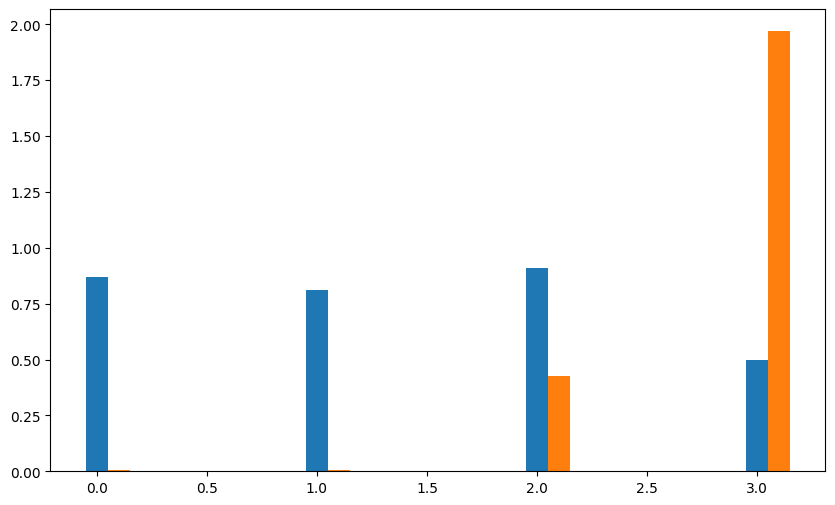

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the metrics for the 'densired_soft_16' dataset
metrics_densired_soft_16 = metrics['densired_soft_16']

# Extract the metric values
metric_values = list(metrics_densired_soft_16.values())

# Extract the algorithm names
algorithm_names = list(metrics_densired_soft_16.keys())
for i in range(len(algorithm_names)):
    if algorithm_names[i] in corc.our_algorithms.ALG_DISPLAYNAMES.keys():
        algorithm_names[i] = corc.our_algorithms.ALG_DISPLAYNAMES[algorithm_names[i]]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Set the x-axis ticks
x = np.arange(len(metric_values[0]))  # number of metrics
width = 0.1  # width of each bar
x_pos = np.arange(len(metric_values[0]))  # positions of the bars

# Plot the bars
for i, algorithm in enumerate(algorithms):
    metric = [metrics_densired_soft_16[algorithm][j] for j in range(len(metric_values[0]))]
    alg_name = corc.our_algorithms.ALG_DISPLAYNAMES[algorithm] if algorithm in corc.our_algorithms.ALG_DISPLAYNAMES.keys() else algorithm
    ax.bar(x_pos + i * width, metric, width, label= alg_name)

# Set the x-axis ticks and labels
ax.set_xticks(x_pos + (len(algorithm_names) - 1) * width / 2)
ax.set_xticklabels(['ARI (↑)', 'NMI (↑)', 'FM (↑)', 'VI (↓)'])

# Set the y-axis label
ax.set_ylabel('Value')

# Set the title
ax.set_title('Metrics for densired_soft_16 dataset')

# Add a legend
ax.legend()
# ax.legend(title='Algorithms')

ax.axvline(x=3.1 - (len(algorithm_names) - 1) * width / 2, color='black', linestyle='--', linewidth=0.5)
# Show the plot
plt.tight_layout()
plt.show()